
# Day 13: Decision Trees for Regression and Classification

Today, we will dive into Decision Trees, one of the most interpretable and widely-used models in machine learning. Decision trees are flexible and powerful tools that can handle both regression and classification tasks. They provide a clear structure that resembles a flowchart, making them easy to understand and interpret.

Topics Covered:
- What is a Decision Tree?
- Decision Trees for Classification
- Decision Trees for Regression
- Key Concepts: Gini Impurity, Entropy, Information Gain
- How Trees Split Data
- Overfitting and Pruning
- Python Implementation and Visualization

## 1. Introduction to Decision Trees

A **Decision Tree** is a flowchart-like structure in which internal nodes represent a feature (or attribute), branches represent decision rules, and each leaf node represents the output label.

It works by recursively partitioning the dataset into smaller subsets based on feature values that result in the **best split**—i.e., most homogeneous child nodes.

### Key charactertics:

- Nodes: 
    - Where a decision is made.
- Edges: 
    - The result of a decision, leading to the next node.
- Leaves: 
    - The final decision or prediction at the end of a path.

Decision trees can be used for:

- Classification: Predicting a category or label (e.g., whether an email is spam or not).
- Regression: Predicting a continuous value (e.g., predicting house prices).


## 2. Key Concepts: Entropy, Gini Impurity, and Information Gain

### 2.1 Entropy

Entropy is a measure of disorder or impurity in the dataset. The higher the entropy, the more mixed the data is.

Formula for Entropy:

$$
Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

Where:
- $ p_i $ is the probability of class $ i $.
- Entropy is 0 if all the data belongs to one class (perfectly pure), and it increases as the data becomes more mixed.

### 2.2 Gini Impurity

Gini Impurity is another measure of how often a randomly chosen element from the set would be incorrectly classified. Lower Gini Impurity values indicate better splits.

$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

Where:
- $ P(x_i) $ is the probability of class $ i $.

### 2.3 Information Gain

Information Gain tells us how much entropy is reduced after splitting the dataset on a particular feature. It helps the decision tree decide which feature to split on at each node.

$$
Information\ Gain = H(parent) - \sum_{i} \left( \frac{N_i}{N} \times H(child_i) \right)
$$

Where:
- $ H(parent) $ is the entropy of the parent node.
- $ H(child_i) $ is the entropy of the child nodes after the split.

## 3. How Decision Trees Work

A decision tree builds itself by splitting the data at each node based on a specific feature that results in the highest information gain (or the lowest Gini impurity). 
The goal is to create branches that effectively divide the data into subsets where the target variable is as homogenous as possible.

### Example: Predicting Customer Churn

Imagine you want to predict whether a customer will churn based on various factors like contract length, monthly charges, and tenure. The decision tree model will first identify the most important feature (e.g., monthly charges) to split the data. Based on the answer (e.g., whether monthly charges are above or below a threshold), the tree moves to the next node, asking another question (e.g., how long the contract is), and so on.


### 3.1 Decision Trees for Classification

Used when the target variable is categorical (e.g., churn or not churn).


#### How It Works:
1. Start at the root node and evaluate each feature to find the best split.

2. Use criteria such as Gini Impurity or Entropy to decide splits.

3. The tree continues to branch until it reaches stopping conditions (e.g., max depth, pure nodes, or minimum samples).

### 3.2 Decision Trees for Regression

Used when the target variable is continuous (e.g., house prices).

#### How It Works:
1. Instead of classification metrics, use Mean Squared Error (MSE) or Mean Absolute Error (MAE) to find the best splits.

2. The final prediction is the mean value of the samples in a leaf node.

## 4. Avoiding Overfitting (Pruning & Depth Control)

Decision Trees are powerful, but they are also prone to overfitting, especially when allowed to grow too deep. Overfitting happens when the model learns too many details and noise from the training data, resulting in poor generalization on unseen dat

### Signs of overfitting:
- Very high accuracy on training data but poor accuracy on test data.
- Very deep trees with many nodes or branches.
- Low bias but high variance.

### Solutions:

#### 1. Max Depth (`max_depth`)

Limits how deep the tree can go.

 - Shallow trees might underfit.

 - Deep trees might overfit.

In [1]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(max_depth=5)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


####  2. Minimum Samples per Leaf ( `min_samples_leaf` )

Specifies the minimum number of samples required at a leaf node. Prevents splitting nodes with very few samples.

In [2]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(min_samples_leaf=4)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 3. Minimum Samples to Split (`min_samples_split`)

Controls the minimum number of samples required to split an internal node.

In [3]:
DecisionTreeClassifier(min_samples_split=10)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 4. Maximum Leaf Nodes (`max_leaf_nodes`)

Limits the number of leaf nodes in the tree. Fewer leaves = simpler tree = lower chance of overfitting.

In [4]:
DecisionTreeClassifier(max_leaf_nodes=20)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,class_weight,None


#### 5. Pruning

- Pre-Pruning: Apply constraints like `max_depth`, `min_samples_split` before building the tree.

- Post-Pruning: Build the full tree and then remove branches that have little importance (available via `ccp_alpha` in scikit-learn).

In [5]:
# Cost complexity pruning (post-pruning)
DecisionTreeClassifier(ccp_alpha=0.01)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 5. Python Implementation

### 5.1 Classification Tree Example

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


### Visualising the tree

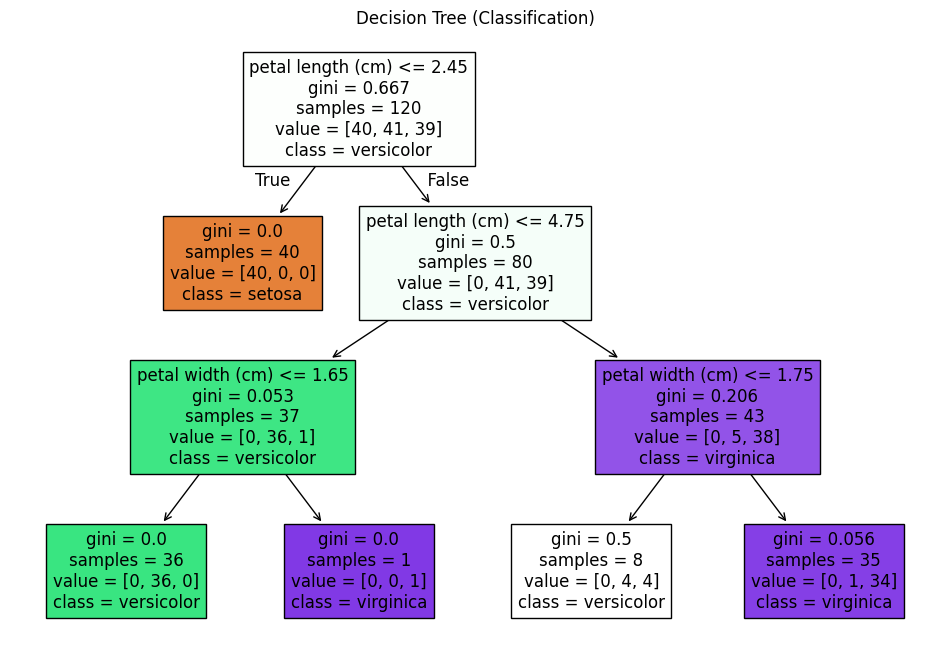

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree (Classification)")
plt.show()


###  Regression Tree Example

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Sample dataset
X = [[1000], [1500], [2000], [2500], [3000]]
y = [200000, 300000, 400000, 500000, 600000]

# Train a regression tree
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# Predict
y_pred = regressor.predict([[1800]])
print("Predicted price:", y_pred)


Predicted price: [400000.]


## Conclusion of Day 13

Today, we understood how **Decision Trees** work for both classification and regression. We explored:
- How trees split using **Gini Impurity**, **Entropy**, and **Information Gain**
- How to **control overfitting** using hyperparameters
- Built and visualized decision trees using **Scikit-learn**

## What's Next?

In **Day 14**, we’ll do a **deep dive into Model Evaluation Metrics**, including:
- Accuracy, MAE, MSE, RMSE, and R² for regression
- Precision, Recall, F1 Score, and ROC-AUC for classification

These metrics are crucial to assess how well your models perform and how to select the best one.